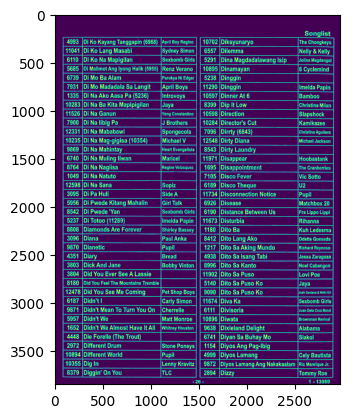

In [94]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
from PIL import Image
import numpy

pytesseract.pytesseract.tesseract_cmd = r'/opt/homebrew/bin/tesseract'

img = cv2.imread("raw/pages/page_1.jpg")

# img = Image.open(r"raw/pages/page_91.jpg")
# width, height = img.size
# t = 150
# b = height - 50

# img_a = img.crop((40, t, width - 1500, b))
# img_b = img.crop((width - 1500, t, width - 40, b))

img = cv2.cvtColor(numpy.array(img), cv2.COLOR_RGB2BGR)

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

# Repair horizontal table lines 
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5,1))
thresh2 = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=1)

plt.imshow(thresh)

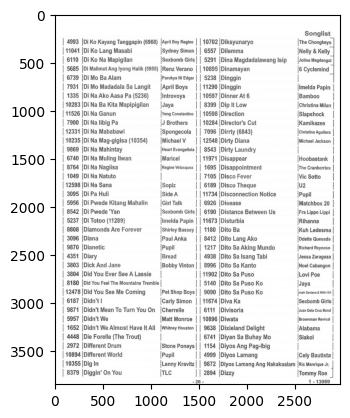

In [95]:
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (55,2))
detect_horizontal = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(img, [c], -1, (255,255,255), 9)

plt.imshow(img)


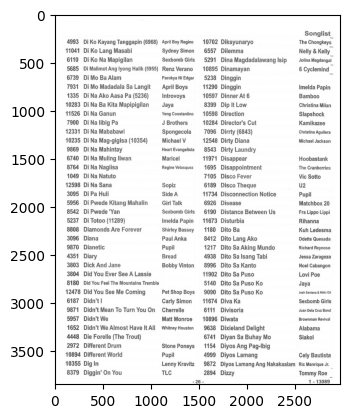

In [97]:
# Remove vertical lines
vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (2,55))
detect_vertical = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
for c in cnts:
    cv2.drawContours(img, [c], -1, (255,255,255), 9)

plt.imshow(img)


In [99]:
# Perform OCR
data = pytesseract.image_to_string(img, lang='eng+fil',config='--psm 6')

['Songlist', '', '4993 Di Ko Kayang Tanggapin (6968) AprilBoyRegino 10702 Diksyunaryo The Chongkeys', '11041 Di Ko Lang Masabi Sydney Simon 6557 Dilemma Nelly & Kelly', '6110 Di Ko Na Mapigilan Sexbomb Girls 5291 Dina Magdadalawang Isip JolinaMagdangal', '5685 Di Malimot Ang lyong Halik (5955) Renz Verano 10895 Dinamayan 6 Cyclemind a', '6739 Di Mo Ba Alam Parokya Ni Edgar. 5238 Dinggin d', '7931 Di Mo Madadala Sa Langit April Boys 11290 Dinggin Imelda Papin', '1335 Di Na Ako Aasa Pa (5236) Introvoys 10597 Dinner At 6 Bamboo', '10283 Di Na Ba Kita Mapipigilan Jaya 8399 Dip It Low Christina Milan', '11526 Di Na Ganun Yeng Constantino 10598 Direction Slapshock', "7900 Di Na libig Pa J Brothers. 10284 Director's Cut Kamikazee", '12331 Di Na Mababawi Spongecola 7096 Dirrty (6843) Christina Aguilera', '10235 Di Na Mag-gigisa (10354) Michael V 12548 Dirty Diana Michael Jackson', '9869 Di Na Mahintay Heart Evangelista 8543 Dirty Laundry', '6740 Di Na Muling liwan Maricel 11971 Disappear Hooba

In [121]:
import re

lines = data.splitlines()
clean_lines = []

regex = re.compile(r'^\s?(\d{3,6})\s?(.*)\s(\d{3,6})\s?(.*?$)')

for l in lines:
  l = l.strip()
  if len(l) == 0:
    continue

  if l.lower() == "songlist": 
    continue
  
  matches = regex.match(l)

  if matches is None:
    continue
  g = matches.groups()
  if 

  clean_lines.append(matches.groups()[0])
  clean_lines.append(matches.groups()[1])
    
print(clean_lines)



['4993', 'Di Ko Kayang Tanggapin (6968) AprilBoyRegino', '11041', 'Di Ko Lang Masabi Sydney Simon', '6110', 'Di Ko Na Mapigilan Sexbomb Girls', '5685', 'Di Malimot Ang lyong Halik (5955) Renz Verano', '6739', 'Di Mo Ba Alam Parokya Ni Edgar.', '7931', 'Di Mo Madadala Sa Langit April Boys', '1335', 'Di Na Ako Aasa Pa (5236) Introvoys', '10283', 'Di Na Ba Kita Mapipigilan Jaya', '11526', 'Di Na Ganun Yeng Constantino', '7900', 'Di Na libig Pa J Brothers.', '12331', 'Di Na Mababawi Spongecola', '10235', 'Di Na Mag-gigisa (10354) Michael V', '9869', 'Di Na Mahintay Heart Evangelista', '6740', 'Di Na Muling liwan Maricel', '8764', 'Di Na Nagiisa Regine Velasquez', '1049', 'Di Na Natuto', '12598', 'Di Na Sana Sopiz', '3095', 'Di Pa Huli Side A', '5956', 'Di Pwede Kitang Mahalin Girl Talk', '5237', 'Di Totoo (11289) Imelda Papin', '8808', 'Diamonds Are Forever Shirley Bassey', '3096', 'Diana Paul Anka', '9870', 'Dianetic Pupil', '4351', 'Diary Bread', '3803', 'Dick And Jane Bobby Vinton', '38